<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Alessandro Gaballo 
<b> Student 2:</b> Jonas Wacker
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

#Your answer goes here :

$w_{1,3}=  0.3043 $ 

$w_{1,4}=  -0.5027 $

$w_{2,3}= 0.8011 $

$w_{2,4}= 0.1993 $

$w_{6,3}= 0.2054 $

$w_{6,4}= -0.4034 $

$w_{3,5}= 0.6254 $

$w_{4,5}= 0.3875 $

$w_{7,5}= 0.4606 $




<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [ ]:
from NeuralNetwork import *
import numpy as np
#create the network
my_first_net = NeuralNetwork(2, 2, 1, learning_rate=1)


In [ ]:
#Data preparation 
X=[0.8,0.2]
Y=[0.4]
data=[]
data.append(X)
data.append(Y)

#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_first_net.weights_initialisation(wi,wo)
print(my_first_net.W_input_to_hidden)
print(my_first_net.W_hidden_to_output)






<b>Question 1.2.2</b>: Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)



In [ ]:
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your FeedForward function here
def transfer_function(self, x):
    return 1.0 / (1.0 + np.exp(-x))
    
def feedForward(self, inputs):
    self.a_input = np.append(inputs, 1)
    a_hidden_without_bias = np.dot(self.a_input, self.W_input_to_hidden)
    self.a_hidden = np.append(a_hidden_without_bias, 0)
    self.o_hidden = self.transfer_function(self.a_hidden)
    self.o_hidden[-1] = 1
    self.a_output = np.dot(self.o_hidden, self.W_hidden_to_output)
    self.o_output = self.transfer_function(self.a_output)
    return self.o_output


Check your network outputs the expected value (the one you computed in question 1.1)

In [ ]:
#test my  Feed Forward function 
Output_activation=my_first_net.feedForward(X)
print("output activation =%.3f" %(Output_activation))


<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)  


In [ ]:
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your BackPropagate function here
def backPropagate(self, targets):
        
    # calculate error terms for output
    self.errors = self.o_output - targets
    delta_e_u_output = self.errors * self.o_output * (1 - self.o_output)
    delta_e_u_horizontal = np.matrix(delta_e_u_output)
    o_hidden_vertical = np.matrix(self.o_hidden).T
        
    delta_e_w_output = np.dot(o_hidden_vertical, delta_e_u_horizontal)

    # calculate error terms for hidden
    delta_e_u_hidden = np.dot(self.W_hidden_to_output, delta_e_u_output) * self.o_hidden * (1 - self.o_hidden)
    delta_e_u_horizontal = np.matrix(delta_e_u_hidden)
    o_input_vertical = np.matrix(self.a_input).T
    delta_e_w_hidden = np.dot(o_input_vertical, delta_e_u_horizontal)
    # delete last column
    # delta_e_w_hidden = delta_e_w_hidden[:,0:delta_e_w_hidden.shape[1]-1]
    delta_e_w_hidden = np.delete(delta_e_w_hidden, -1, 1)
    # update output weights
    self.W_hidden_to_output -= self.learning_rate * delta_e_w_output
    # update input weights
    self.W_input_to_hidden -= self.learning_rate * delta_e_w_hidden
        
    return np.square(self.errors).sum()/2


Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [ ]:
#test my  Back-propagation function
my_first_net.backPropagate(Y)
#Print weights after backpropagation
print('wi_new=', my_first_net.W_input_to_hidden)
print('wo_new=', my_first_net.W_hidden_to_output)







Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [1]:
from utils import *
training_data, validation_data, test_data=load_data()







Loading MNIST data .....
Done.


<b>MNIST Dataset Digits Visualisation</b>

In [ ]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()



<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [2]:
#create the network
from NeuralNetwork import NeuralNetwork 

input_nodes = 784
hidden_nodes = 30
output_nodes = 10

my_mnist_net = NeuralNetwork(input_nodes, hidden_nodes, output_nodes)



<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [ ]:
test_accuracy=my_mnist_net.predict(test_data) / 100
print('Test_Accuracy  %-2.2f' % test_accuracy)




<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

In [ ]:
#train your network 
my_mnist_net.train(training_data,validation_data)

#save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)

In [ ]:
my_mnist_net.save('NN_MNIST_default_params')
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)


#Note your observations here. 

<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


In [ ]:
#Your implementation goes here

#DON'T KNOW HOW TO READ THE IMG
import os
from scipy import misc
def guess_digit(nn, sample):
    prediction = nn.feedForward(sample)
    return np.argmax(prediction)

dirname = 'Images_test'

for image in os.listdir(dirname):
    data = misc.imread(os.path.join(dirname, image), flatten=True)
    resized = misc.imresize(data, (28,28))
    print(guess_digit(my_mnist_net, resized))
    #ata = data.reshape((28,28))
    #np_f = np.array(data) / 255.0
    






<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

Iteration:  1/50[==============] -Error: 0.4954348154  -Training_Accuracy:  44.46  -time: 20.14 
Iteration:  2/50[==============] -Error: 0.3847908175  -Training_Accuracy:  52.34  -time: 41.70 
Iteration:  3/50[==============] -Error: 0.3464662448  -Training_Accuracy:  58.45  -time: 63.14 
Iteration:  4/50[==============] -Error: 0.3186507142  -Training_Accuracy:  62.63  -time: 84.30 
Iteration:  5/50[==============] -Error: 0.2974612578  -Training_Accuracy:  65.13  -time: 106.08 
Iteration:  6/50[==============] -Error: 0.2805987814  -Training_Accuracy:  67.27  -time: 126.14 
Iteration:  7/50[==============] -Error: 0.2667431729  -Training_Accuracy:  68.72  -time: 147.04 
Iteration:  8/50[==============] -Error: 0.2550739372  -Training_Accuracy:  69.89  -time: 168.11 
Iteration:  9/50[==============] -Error: 0.2450336529  -Training_Accuracy:  71.15  -time: 190.17 
Iteration: 10/50[==============] -Error: 0.2362537736  -Training_Accuracy:  72.08  -time: 209.97 
Iteration: 11/50[=======

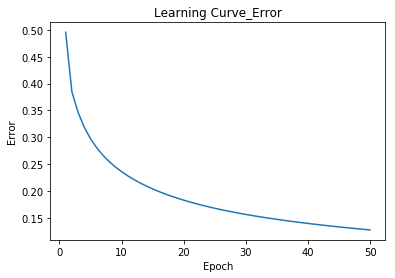

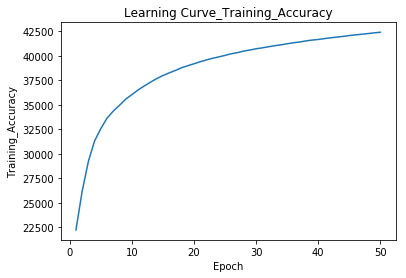

Learning rate 0.001000, Test_Accuracy  86.29


In [5]:
#Your implementation with a learning rate of 0.001 goes here 

learning_rate = 0.001

my_mnist_net_1 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate=learning_rate)
val_accuracies_1 = my_mnist_net_1.train(training_data,validation_data)
test_accuracy = my_mnist_net_1.predict(test_data)/100

print('Learning rate %f, Test_Accuracy  %-2.2f' % (learning_rate, test_accuracy))

my_mnist_net_1.save('NN_MNIST_0-001')

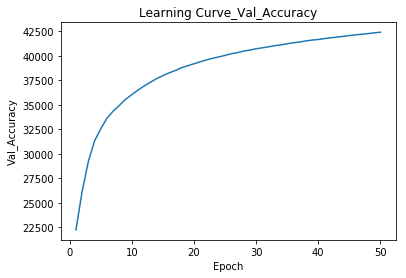

In [6]:
plot_curve(range(1,my_mnist_net_1.iterations+1), val_accuracies_1, "Val_Accuracy")

In [ ]:
#Your implementation with a learning rate of 1.0 goes here 

learning_rate = 1.0

my_mnist_net_2 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate=learning_rate)
val_accuracies_2 = my_mnist_net_2.train(training_data,validation_data)
test_accuracy = my_mnist_net_2.predict(test_data)/100

print('Learning rate %f, Test_Accuracy  %-2.2f' % (learning_rate, test_accuracy))

my_mnist_net_2.save('NN_MNIST_1-00')


Iteration:  1/50[==============] -Error: 0.1136565487  -Training_Accuracy:  90.89  -time: 21.38 
Iteration:  2/50[==============] -Error: 0.0782534280  -Training_Accuracy:  91.62  -time: 41.58 
Iteration:  3/50[==============] -Error: 0.0680930232  -Training_Accuracy:  92.84  -time: 63.04 
Iteration:  4/50[==============] -Error: 0.0615476834  -Training_Accuracy:  93.66  -time: 83.88 
Iteration:  5/50[==============] -Error: 0.0584206668  -Training_Accuracy:  93.26  -time: 104.18 
Iteration:  6/50[==============] -Error: 0.0570857734  -Training_Accuracy:  93.37  -time: 123.51 
Iteration:  7/50[==============] -Error: 0.0539685170  -Training_Accuracy:  94.53  -time: 145.35 
Iteration:  8/50[==============] -Error: 0.0528203381  -Training_Accuracy:  94.16  -time: 169.82 
Iteration:  9/50[==============] -Error: 0.0511300891  -Training_Accuracy:  94.36  -time: 192.88 
Iteration: 10/50[==============] -Error: 0.0494470601  -Training_Accuracy:  94.70  -time: 216.79 
Iteration: 11/50[=======

In [ ]:
plot_curve(range(1,my_mnist_net_2.iterations+1), val_accuracies_2, "Val_Accuracy")

In [ ]:
#Your implementation with a learning rate of 10 goes here 


learning_rate = 10

my_mnist_net_3 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate=learning_rate)
val_accuracies_3 = my_mnist_net_3.train(training_data,validation_data)
test_accuracy=my_mnist_net_3.predict(test_data)/100
print('Learning rate %f, Test_Accuracy  %-2.2f' % (learning_rate, test_accuracy))
my_mnist_net_3.save('NN_MNIST_10-0')

In [ ]:
plot_curve(range(1,my_mnist_net_3.iterations+1), val_accuracies_3, "Val_Accuracy")

#Your answer for Question 2.2.1 goes here

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

In [ ]:
#Your implementation goes here
my_mnist_net_zeros = NeuralNetwork(input_nodes, hidden_nodes, output_nodes)

input_hidden_weights = np.zeros(my_mnist_net_zeros.input, my_mnist_net_zeros.hidden-1)
hidden_output_weights = np.zeros(my_mnist_net_zeros.hidden, my_mnist_net_zeros.output)

my_mnist_net_zeros.weights_initialisation(input_hidden_weights, hidden_output_weights)

my_mnist_net_zeros.train(training_data,validation_data)



#Your answer goes here

<b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative

In [ ]:
#Your implementation goes here

my_mnist_net_tanh = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, transfer='tanh')
#Your implementation goes here
my_mnist_net_tanh.train(training_data,validation_data)














#Your answer goes here


<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

In [ ]:
#Your implementation goes here

learning_rate = 0.001

my_mnist_net_100_hidden = NeuralNetwork(input_nodes, 100, output_nodes, learning_rate=learning_rate)
val_accuracies_100 = my_mnist_net_100_hidden.train(training_data,validation_data)
print(val_accuracies_100[-1])

my_mnist_net_200_hidden = NeuralNetwork(input_nodes, 200, output_nodes, learning_rate=learning_rate)
val_accuracies_200 = my_mnist_net_200_hidden.train(training_data,validation_data)
print(val_accuracies_200[-1])

my_mnist_net_300_hidden = NeuralNetwork(input_nodes, 300, output_nodes, learning_rate=learning_rate)
val_accuracies_300 = my_mnist_net_300_hidden.train(training_data,validation_data)
print(val_accuracies_300[-1])



#Your answer goes here

<b> Question 2.2.5 : </b> Add one additionnal hidden layers and train your network, discuss your results with different setting. 



In [ ]:
#Your implementation goes here


import NeuralNetwork2 import NeuralNetwork

#create the network
from NeuralNetwork import NeuralNetwork 

input_nodes = 784
hidden_nodes_1 = 30
hidden_nodes_2 = 30
output_nodes = 10

my_mnist_net = NeuralNetwork2(input_nodes, hidden_nodes_1, hidden_nodes_2, output_nodes)
my_mnist_net.train(training_data,validation_data)











#Your answer goes here